In [197]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
# Load the dataset
file_path = "dataset_source.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df_info = df.info()
df_head = df.head()


df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   injuries_direct   761 non-null    int64  
 1   deaths_direct     761 non-null    int64  
 2   event_latitude    761 non-null    float64
 3   event_longitude   761 non-null    float64
 4   event_range       761 non-null    float64
 5   event_type        761 non-null    object 
 6   event_begin_time  761 non-null    object 
 7   event_end_time    761 non-null    object 
 8   damage_property   761 non-null    int64  
 9   source            761 non-null    object 
 10  rn                761 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 65.5+ KB


,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_type,event_begin_time,event_end_time,damage_property,source,rn
count,761.000000,761.000000,761.000000,761.000000,761.000000,761,761,761,7.610000e+02,761,761.000000
unique,NaN,NaN,NaN,NaN,NaN,4,449,449,NaN,30,NaN
top,NaN,NaN,NaN,NaN,NaN,flash flood,2024-07-10T21:30:00,2023-01-01T23:59:00,NaN,NWS Storm Survey,NaN
freq,NaN,NaN,NaN,NaN,NaN,200,10,13,NaN,223,NaN
mean,2.721419,0.629435,35.747277,-89.650005,2.655440,NaN,NaN,NaN,1.545455e+07,NaN,96.374507
std,6.361370,1.299545,6.099935,17.587892,3.083233,NaN,NaN,NaN,1.071591e+08,NaN,56.148045
min,0.000000,0.000000,7.360600,-124.120000,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,1.000000
25%,0.000000,0.000000,33.000000,-97.096600,0.910000,NaN,NaN,NaN,0.000000e+00,NaN,48.000000
50%,1.000000,0.000000,36.180000,-89.150000,1.820000,NaN,NaN,NaN,1.500000e+04,NaN,96.000000
75%,2.000000,1.000000,39.087400,-81.810000,3.150000,NaN,NaN,NaN,8.500000e+05,NaN,143.000000


In [239]:
# Convert time columns to datetime
df['event_begin_time'] = pd.to_datetime(df['event_begin_time'])
df['event_end_time'] = pd.to_datetime(df['event_end_time'])

# Calculate event_duration in minutes
df['event_duration'] = (df['event_end_time'] - df['event_begin_time']).dt.total_seconds() / 60

# Convert event_range to float (if not already)
df['event_range'] = df['event_range'].astype(float)

# Drop the 'rn' column
df.drop(columns=['rn'], inplace=True)

# One-hot encode 'event_type'
df = pd.get_dummies(df, columns=['event_type'], prefix='event')
df = pd.get_dummies(df, columns=['source'], prefix='source')

In [240]:
df.head()

,injuries_direct,deaths_direct,event_latitude,event_longitude,event_range,event_begin_time,event_end_time,damage_property,event_duration,event_flash flood,...,source_NWS Storm Survey,source_Newspaper,source_OFFICIAL NWS OBS.,source_Other Federal Agency,source_Park/Forest Service,source_Public,source_Social Media,source_State Official,source_TRAINED SPOTTER,source_Trained Spotter
0,5,0,35.2174,-111.7912,2.36,2024-10-18 07:00:00,2024-10-18 07:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False
1,5,0,35.1951,-111.7083,3.31,2024-10-18 07:00:00,2024-10-18 07:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0,43.2988,-111.1497,5.00,2024-08-10 12:36:00,2024-08-10 12:50:00,0,14.0,False,...,False,False,False,False,False,True,False,False,False,False
3,4,0,43.3091,-111.1637,4.00,2024-08-10 12:35:00,2024-08-10 12:45:00,0,10.0,False,...,False,False,False,False,False,True,False,False,False,False
4,3,0,43.9100,-116.8100,4.18,2024-06-26 13:00:00,2024-06-26 13:10:00,0,10.0,False,...,False,False,False,False,False,False,False,False,False,False


In [201]:
df.columns.tolist()

['injuries_direct',
 'deaths_direct',
 'event_latitude',
 'event_longitude',
 'event_range',
 'event_begin_time',
 'event_end_time',
 'damage_property',
 'event_duration',
 'event_flash flood',
 'event_hail',
 'event_thunderstorm wind',
 'event_tornado',
 'source_911 Call Center',
 'source_AMATEUR RADIO',
 'source_ASOS',
 'source_Amateur Radio',
 'source_Broadcast Media',
 'source_COOP Observer',
 'source_CoCoRaHS',
 'source_County Official',
 'source_Department of Highways',
 'source_EMERGENCY MANAGER',
 'source_Emergency Manager',
 'source_FIRE DEPT/RESCUE SQUAD',
 'source_Fire Department/Rescue',
 'source_GENERAL PUBLIC',
 'source_LAW ENFORCEMENT',
 'source_Law Enforcement',
 'source_Local Official',
 'source_NEWSPAPER',
 'source_NWS Employee',
 'source_NWS STORM SURVEY',
 'source_NWS Storm Survey',
 'source_Newspaper',
 'source_OFFICIAL NWS OBS.',
 'source_Other Federal Agency',
 'source_Park/Forest Service',
 'source_Public',
 'source_Social Media',
 'source_State Official',
 'sou

# Tornado

In [ ]:
df_tornado = df[df['event_tornado'] == 1].copy()

# Drop non-numeric columns and target

source_cols = [col for col in df_tornado.columns if col.startswith('source_')]

# Drop source columns that are all zeros for that row (i.e., retain only true sources)
df_tornado_filtered = df_tornado[df_tornado[source_cols].sum(axis=1) > 0].copy()

# Now drop all event and irrelevant columns
X = df_tornado_filtered.drop(columns=[
    'damage_property',
    'event_begin_time',
    'event_end_time',
    'event_tornado',
    'event_hail',
    'event_flash flood',
    'event_thunderstorm wind'
] + [col for col in source_cols if df_tornado_filtered[col].nunique() == 1 and df_tornado_filtered[col].iloc[0] == 0])
# X = df_tornado.drop(columns=['damage_property', 'event_begin_time', 'event_end_time', 'event_tornado', 'event_hail', 'event_flash flood', 'event_thunderstorm wind'])
y = df_tornado['damage_property']
# y = np.log1p(df_tornado['damage_property'])  # to reduce scale issues


# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

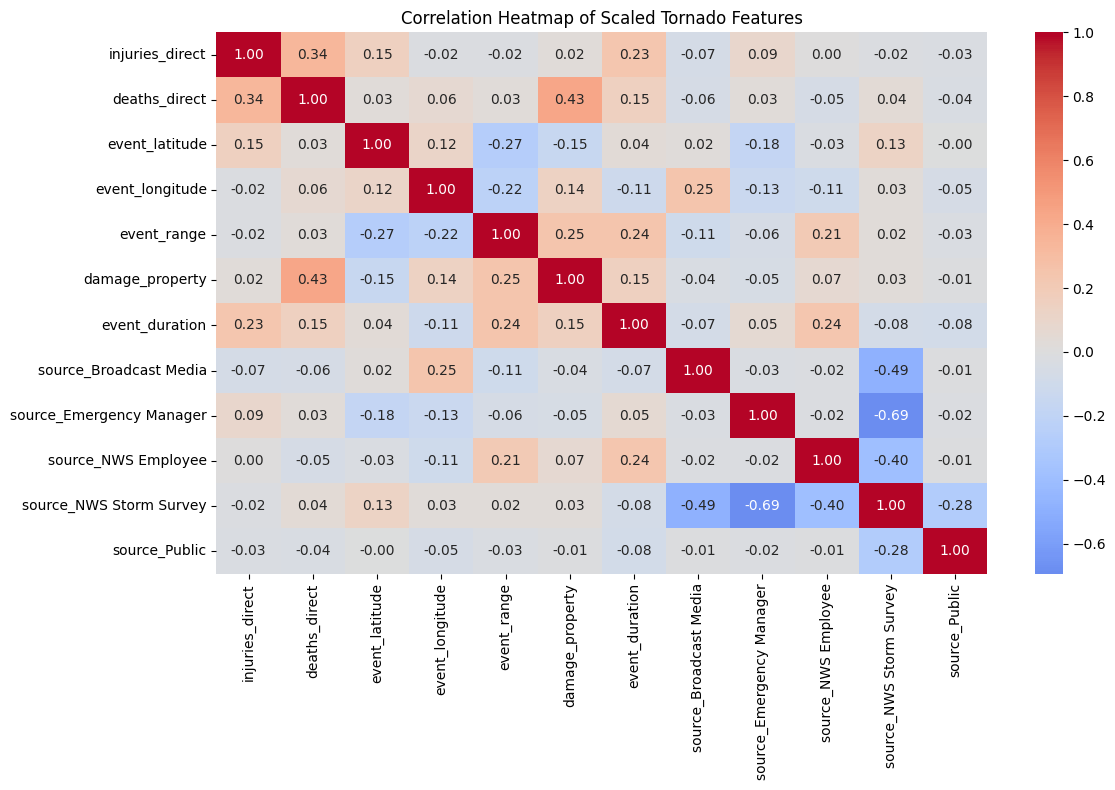

In [ ]:
# Compute correlation matrix
corr_matrix = X_train_scaled.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Scaled Tornado Features")
plt.tight_layout()
plt.show()

In [366]:
# Initialize and train tornado models
tornado_models = {
    "Linear Regression (Tornado)": LinearRegression(),
    "Random Forest Regressor (Tornado)": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate
results_tornado = []
for name, model in tornado_models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse_tornado = np.sqrt(mean_squared_error(y_test, preds))
    r2_tornado = r2_score(y_test, preds)
    results_tornado.append({
        "Model": name,
        "RMSE": rmse_tornado,
        "R² Score": r2_tornado
    })

# Show results
results_tornado_df = pd.DataFrame(results_tornado)
print(results_tornado_df)


                               Model          RMSE  R² Score
0        Linear Regression (Tornado)  5.681392e+07  0.410349
1  Random Forest Regressor (Tornado)  2.778637e+07  0.858958


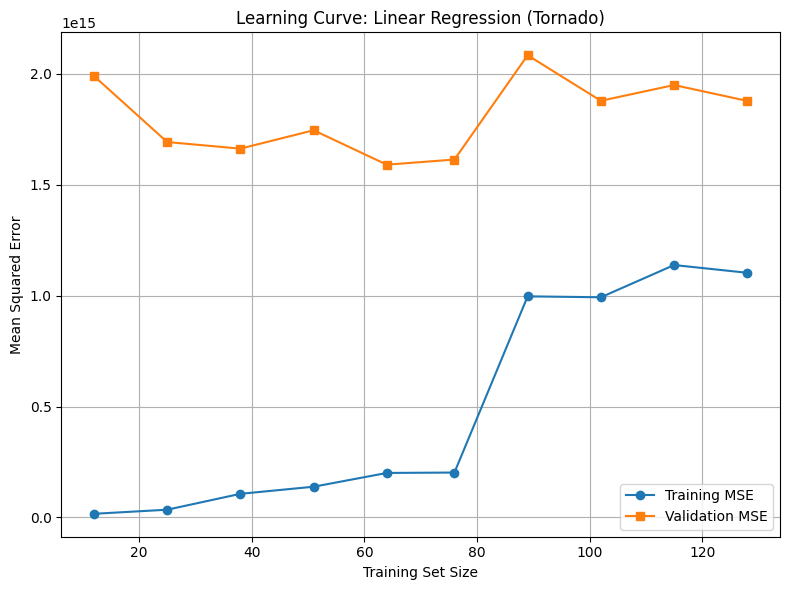

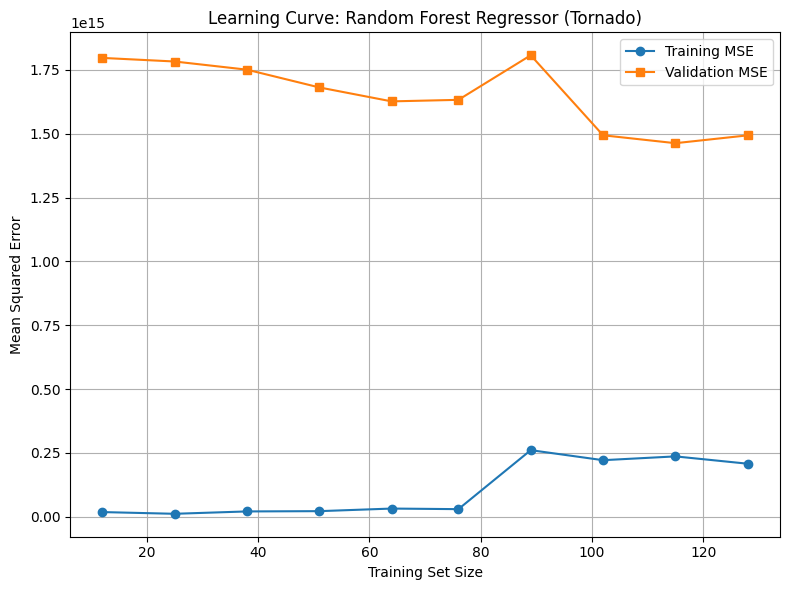

In [367]:
# Plot learning curves using MSE for tornado models
for name, model in tornado_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train_scaled,  # Tornado features
        y=y_train,         # Tornado target
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # Convert negative MSE to positive values
    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mse_mean, label="Training MSE", marker='o')
    plt.plot(train_sizes, test_mse_mean, label="Validation MSE", marker='s')
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Flash Flood

In [361]:
# Filter for flash flood events
df_flashflood = df[df['event_flash flood'] == 1].copy()

source_cols = [col for col in df_flashflood.columns if col.startswith('source_')]

# Drop source columns that are all zeros for that row (i.e., retain only true sources)
df_flashflood_filtered = df_flashflood[df_flashflood[source_cols].sum(axis=1) > 0].copy()

# Now drop all event and irrelevant columns
X_flood = df_flashflood_filtered.drop(columns=[
    'damage_property',
    'event_begin_time',
    'event_end_time',
    'event_tornado',
    'event_hail',
    'event_flash flood',
    'event_thunderstorm wind'
] + [col for col in source_cols if df_flashflood_filtered[col].nunique() == 1 and df_flashflood_filtered[col].iloc[0] == 0])


# Prepare features and target
# X_flood = df_flashflood.drop(columns=['damage_property','event_begin_time', 'event_end_time', 'event_tornado', 'event_hail', 'event_flash flood', 'event_thunderstorm wind'])
y_flood = df_flashflood['damage_property']
# y_flood = np.log1p(df_flashflood['damage_property'])  # to reduce scale issues

# Split and scale
X_train_flood, X_test_flood, y_train_flood, y_test_flood = train_test_split(X_flood, y_flood, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_flood = pd.DataFrame(scaler.fit_transform(X_train_flood), columns=X_flood.columns, index=X_train_flood.index)
X_test_scaled_flood = pd.DataFrame(scaler.transform(X_test_flood), columns=X_flood.columns, index=X_test_flood.index)

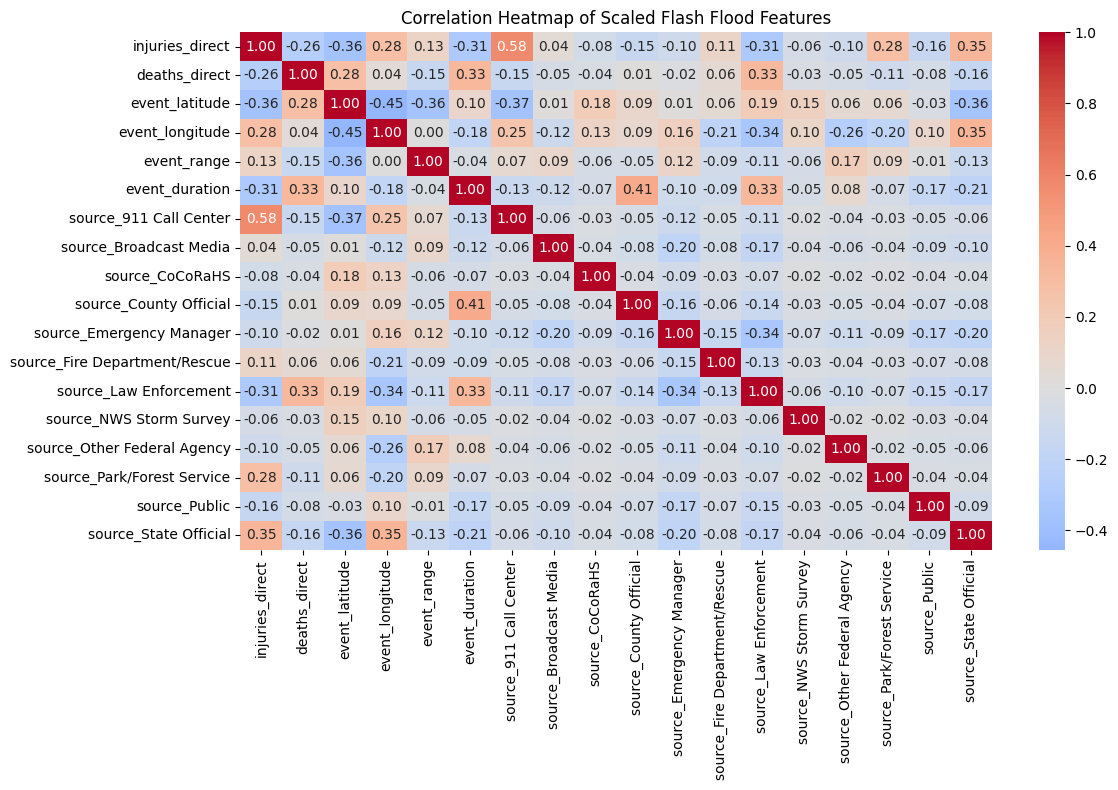

In [ ]:
# Compute correlation matrix
corr_matrix = X_train_scaled_flood.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Scaled Flash Flood Features")
plt.tight_layout()
plt.show()

In [363]:
# Initialize and train models
flood_models = {
    "Linear Regression (Flash Flood)": LinearRegression(),
    "Random Forest Regressor (Flash Flood)": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate
results_flood = []
for name, model in flood_models.items():
    model.fit(X_train_scaled_flood, y_train_flood)
    preds = model.predict(X_test_scaled_flood)
    rmse_flood = np.sqrt(mean_squared_error(y_test_flood, preds))
    r2_flood = r2_score(y_test_flood, preds)
    results_flood.append({
        "Model": name,
        "RMSE": rmse_flood,
        "R² Score": r2_flood
    })

# Show results
results_flood_df = pd.DataFrame(results_flood)
print(results_flood_df)


                                   Model          RMSE  R² Score
0        Linear Regression (Flash Flood)  9.951408e+07  0.164533
1  Random Forest Regressor (Flash Flood)  2.064442e+07  0.964044


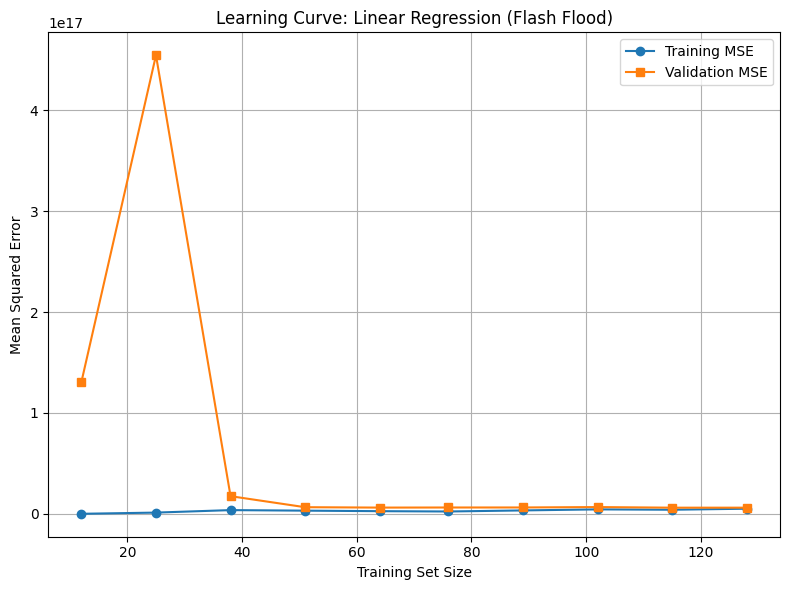

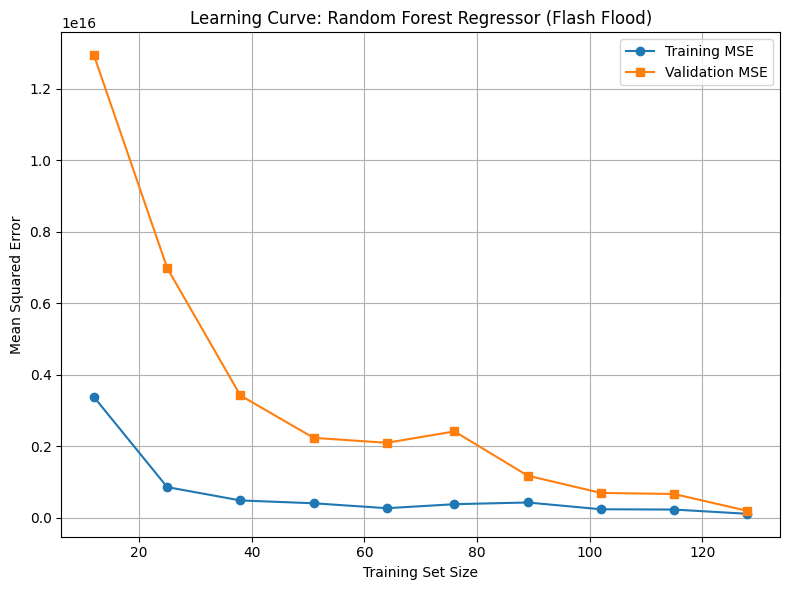

In [365]:
# Plot learning curves using MSE for flood models
for name, model in flood_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train_scaled_flood,  # <- use flood features
        y=y_train_flood,         # <- use flood target
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # Convert negative MSE to positive values
    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mse_mean, label="Training MSE", marker='o')
    plt.plot(train_sizes, test_mse_mean, label="Validation MSE", marker='s')
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Hail


In [383]:
# Filter for hail events
df_hail = df[df['event_hail'] == 1].copy()

source_cols = [col for col in df_hail.columns if col.startswith('source_')]

# Drop source columns that are all zeros for that row (i.e., retain only true sources)
df_hail_filtered = df_hail[df_hail[source_cols].sum(axis=1) > 0].copy()

# Now drop all event and irrelevant columns
X_hail = df_hail_filtered.drop(columns=[
    'damage_property',
    'event_begin_time',
    'event_end_time',
    'event_tornado',
    'event_hail',
    'event_flash flood',
    'source_Local Official',
    'source_Social Media',
    'event_thunderstorm wind'
] + [col for col in source_cols if df_hail_filtered[col].nunique() == 1 and df_hail_filtered[col].iloc[0] == 0])


# Prepare features and target
# X_flood = df_flashflood.drop(columns=['damage_property','event_begin_time', 'event_end_time', 'event_tornado', 'event_hail', 'event_flash flood', 'event_thunderstorm wind'])
# y_hail = df_hail['damage_property']
# y_flood = np.log1p(df_hail['damage_property'])  # to reduce scale issues
y_hail = np.log1p(df_hail_filtered['damage_property'])

# Split and scale
X_train_hail, X_test_hail, y_train_hail, y_test_hail = train_test_split(X_hail, y_hail, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_hail = pd.DataFrame(scaler.fit_transform(X_train_hail), columns=X_hail.columns, index=X_train_hail.index)
X_test_scaled_hail = pd.DataFrame(scaler.transform(X_test_hail), columns=X_hail.columns, index=X_test_hail.index)

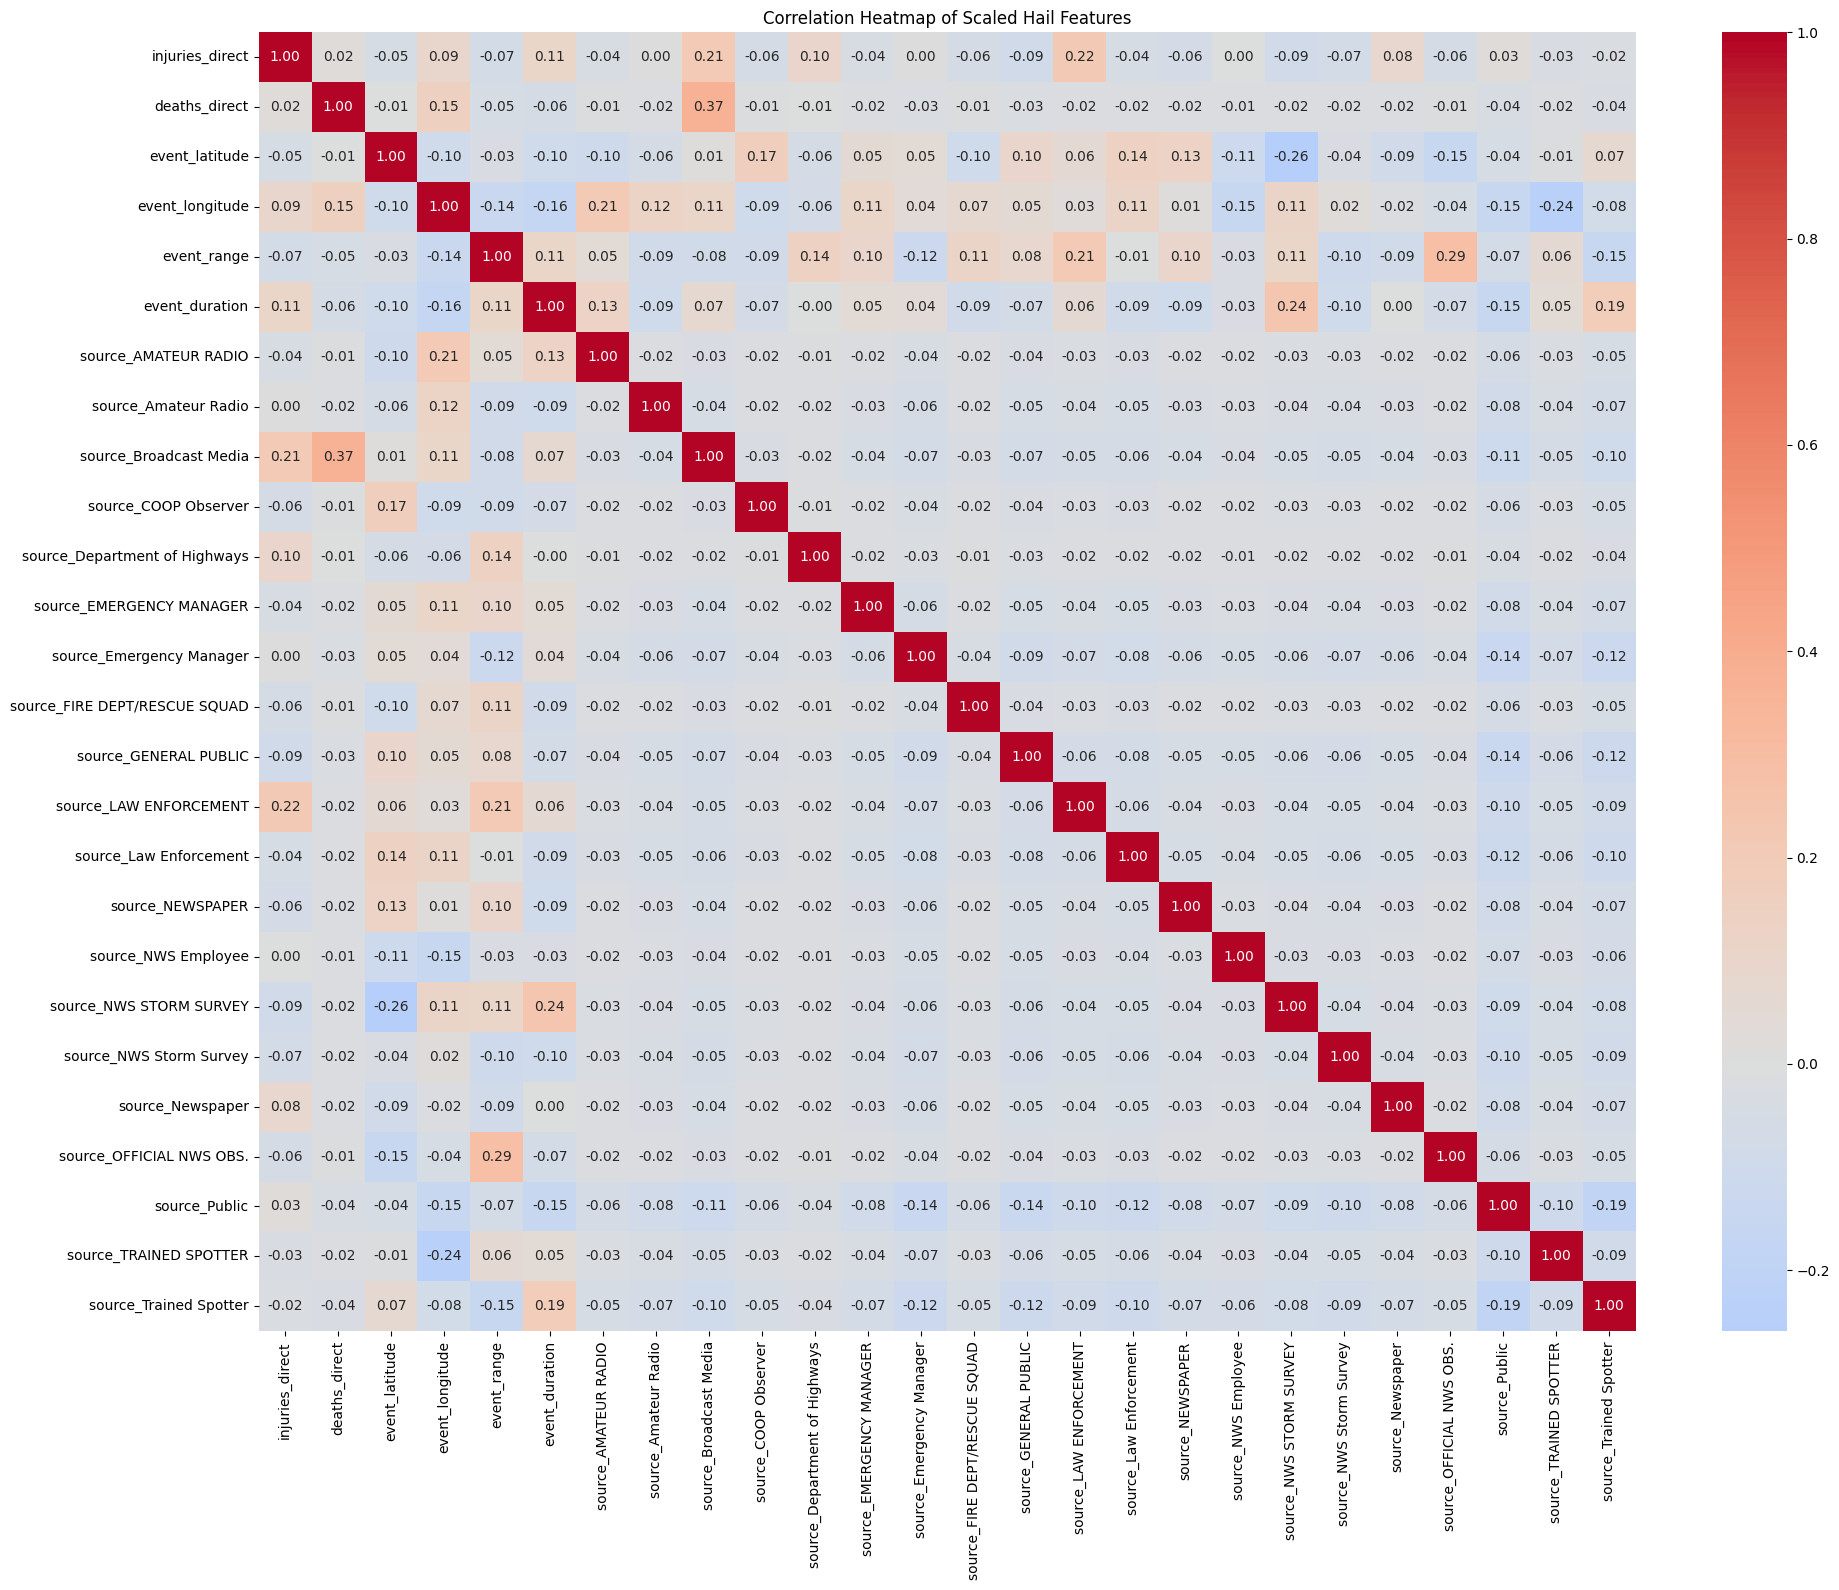

In [384]:
# Compute correlation matrix
corr_matrix = X_train_scaled_hail.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Scaled Hail Features")
plt.tight_layout()
plt.show()

In [385]:
# Grid search for the best Random Forest model (Hail)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled_hail, y_train_hail)
best_rf_hail = grid_search.best_estimator_
print("Best parameters (Hail):", grid_search.best_params_)

# Define hail-specific models
hail_models = {
    "Linear Regression (Hail)": LinearRegression(),
    "Random Forest Regressor (Hail)": RandomForestRegressor(n_estimators=100, random_state=42),
    "Random Forest (GridSearchCV)": best_rf_hail
}

# Train, predict, and evaluate
results_hail = []
for name, model in hail_models.items():
    model.fit(X_train_scaled_hail, y_train_hail)
    preds_log = model.predict(X_test_scaled_hail)

    # Back-transform predictions from log scale
    preds_real = np.expm1(preds_log)
    y_test_real = np.expm1(y_test_hail)

    rmse_hail = np.sqrt(mean_squared_error(y_test_real, preds_real))
    r2_hail = r2_score(y_test_real, preds_real)

    results_hail.append({
        "Model": name,
        "RMSE": rmse_hail,
        "R² Score": r2_hail
    })

# Show results in one table
results_hail_df = pd.DataFrame(results_hail)
print(results_hail_df)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters (Hail): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
                            Model          RMSE      R² Score
0        Linear Regression (Hail)  5.576990e+11 -4.166551e+09
1  Random Forest Regressor (Hail)  7.479171e+06  2.506513e-01
2    Random Forest (GridSearchCV)  7.881403e+06  1.678837e-01


In [ ]:
# Plot learning curves using MSE for hail models
for name, model in hail_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train_scaled_hail,
        y=y_train_hail,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # Convert negative MSE to positive values
    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mse_mean, label="Training MSE", marker='o')
    plt.plot(train_sizes, test_mse_mean, label="Validation MSE", marker='s')
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Thunderstorm Winds

In [326]:
# Filter for thunderstorm wind events
df_thunderstorm_wind = df[df['event_thunderstorm wind'] == 1].copy()

source_cols = [col for col in df_thunderstorm_wind.columns if col.startswith('source_')]

# Drop source columns that are all zeros for that row (i.e., retain only true sources)
df_thunderstorm_wind_filtered = df_thunderstorm_wind[df_thunderstorm_wind[source_cols].sum(axis=1) > 0].copy()

# Now drop all event and irrelevant columns
X_thunderstorm_wind = df_thunderstorm_wind_filtered.drop(columns=[
    'damage_property',
    'event_begin_time',
    'event_end_time',
    'event_tornado',
    'event_hail',
    'event_flash flood',
    'event_thunderstorm wind'
] + [col for col in source_cols if df_thunderstorm_wind_filtered[col].nunique() == 1 and df_thunderstorm_wind_filtered[col].iloc[0] == 0])

# Prepare features and target
# X_thunderstorm_wind = df_thunderstorm_wind.drop(columns=['damage_property', 'event_begin_time', 'event_end_time', 'event_tornado', 'event_hail', 'event_flash flood', 'event_thunderstorm wind'])
y_thunderstorm_wind = df_thunderstorm_wind['damage_property']
# y_thunderstorm_wind = np.log1p(df_thunderstorm_wind_filtered['damage_property'])  # to reduce scale issues

# Split and scale
X_train_thunderstorm_wind, X_test_thunderstorm_wind, y_train_thunderstorm_wind, y_test_thunderstorm_wind = train_test_split(X_thunderstorm_wind, y_thunderstorm_wind, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_thunderstorm_wind = pd.DataFrame(scaler.fit_transform(X_train_thunderstorm_wind), columns=X_thunderstorm_wind.columns, index=X_train_thunderstorm_wind.index)
X_test_scaled_thunderstorm_wind = pd.DataFrame(scaler.transform(X_test_thunderstorm_wind), columns=X_thunderstorm_wind.columns, index=X_test_thunderstorm_wind.index)

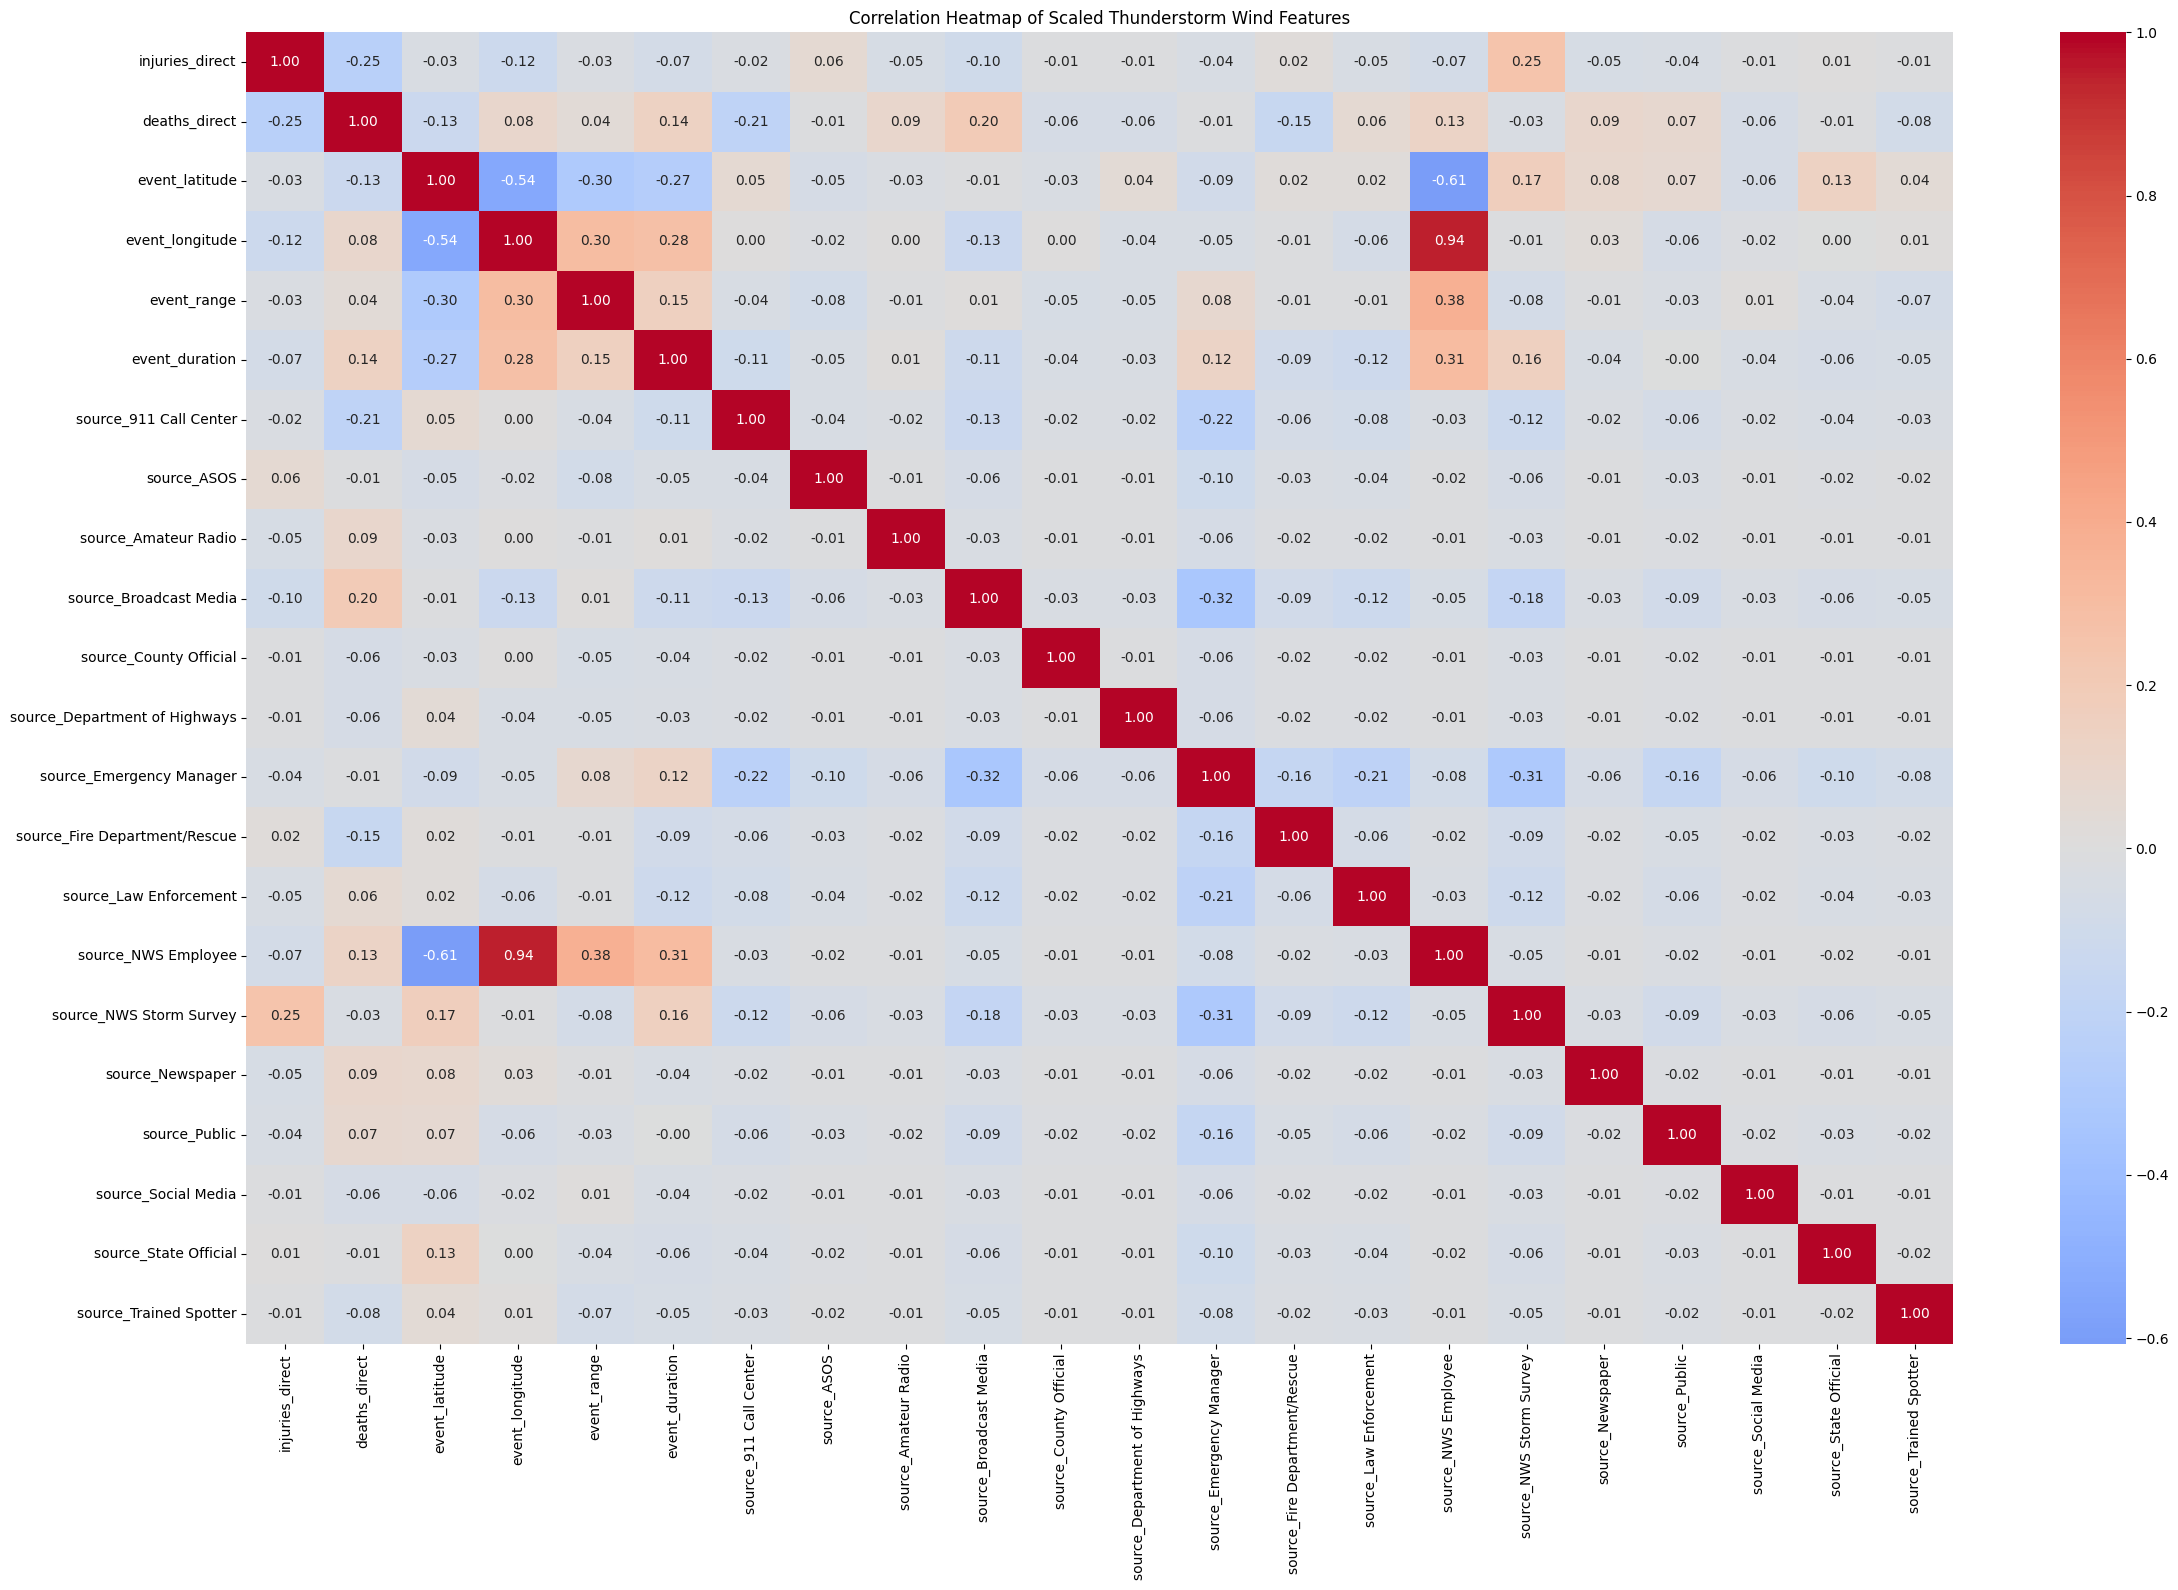

In [213]:
# Compute correlation matrix
corr_matrix = X_train_scaled_thunderstorm_wind.corr()

# Plot heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Scaled Thunderstorm Wind Features")
plt.tight_layout()
plt.show()

In [368]:
# Initialize thunderstorm wind models
thunderstorm_models = {
    "Linear Regression (Thunderstorm Winds)": LinearRegression(),
    "Random Forest Regressor (Thunderstorm Winds)": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate
results_thunderstorm_wind = []
for name, model in thunderstorm_models.items():
    model.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)
    preds = model.predict(X_test_scaled_thunderstorm_wind)
    rmse_wind = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, preds))
    r2_wind = r2_score(y_test_thunderstorm_wind, preds)
    results_thunderstorm_wind.append({
        "Model": name,
        "RMSE": rmse_wind,
        "R² Score": r2_wind
    })

# Show results
results_thunderstorm_wind_df = pd.DataFrame(results_thunderstorm_wind)
print(results_thunderstorm_wind_df)

                                          Model          RMSE  R² Score
0        Linear Regression (Thunderstorm Winds)  1.523770e+06  0.071012
1  Random Forest Regressor (Thunderstorm Winds)  3.747842e+05  0.943800


In [328]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )
# grid_search.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)
# best_rf = grid_search.best_estimator_
# print("Best parameters:", grid_search.best_params_)

# models = {
#     "Linear Regression (Thunderstorm Winds)": LinearRegression(),
#     "Random Forest Regressor (Thunderstorm Winds)": RandomForestRegressor(n_estimators=100, random_state=42),
#     "Random Forest (GridSearchCV)": best_rf
# }

# results_thunderstorm_wind = []
# for name, model in models.items():
#     model.fit(X_train_scaled_thunderstorm_wind, y_train_thunderstorm_wind)
#     preds = model.predict(X_test_scaled_thunderstorm_wind)  # Predict on test set
#     rmse = np.sqrt(mean_squared_error(y_test_thunderstorm_wind, preds))  # Calculate RMSE
#     r2 = r2_score(y_test_thunderstorm_wind, preds)  # Calculate R² score

#     results_thunderstorm_wind.append({
#         "Model": name,
#         "RMSE": rmse,
#         "R² Score": r2
#     })

# # Show results in one table
# results_thunderstorm_wind_df = pd.DataFrame(results_thunderstorm_wind)
# print(results_thunderstorm_wind_df)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
                            Model          RMSE  R² Score
0        Linear Regression (Hail)  1.523770e+06  0.071012
1  Random Forest Regressor (Hail)  3.747842e+05  0.943800
2    Random Forest (GridSearchCV)  4.395472e+05  0.922699


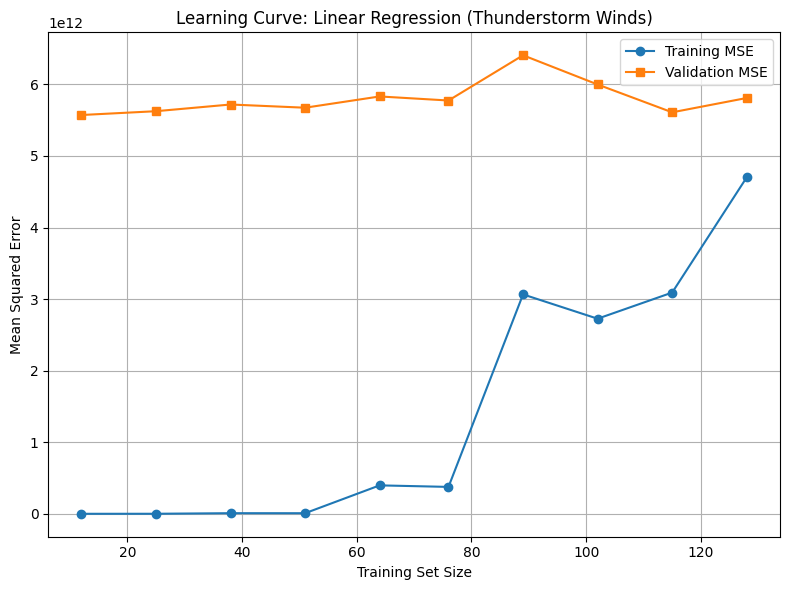

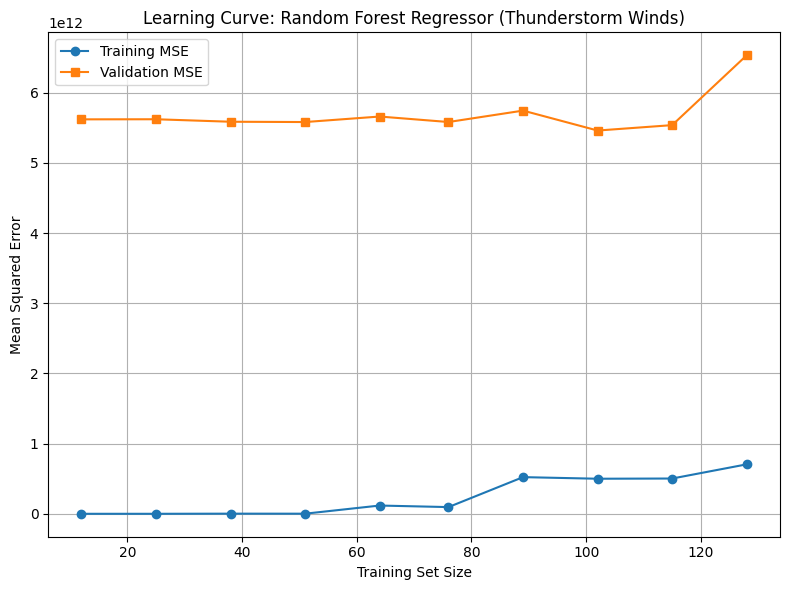

In [369]:
# Plot learning curves using MSE for thunderstorm wind models
for name, model in thunderstorm_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train_scaled_thunderstorm_wind,
        y=y_train_thunderstorm_wind,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # Convert negative MSE to positive values
    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mse_mean, label="Training MSE", marker='o')
    plt.plot(train_sizes, test_mse_mean, label="Validation MSE", marker='s')
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
!apt-get install -y libgeos-dev
!pip install basemap basemap-data-hires

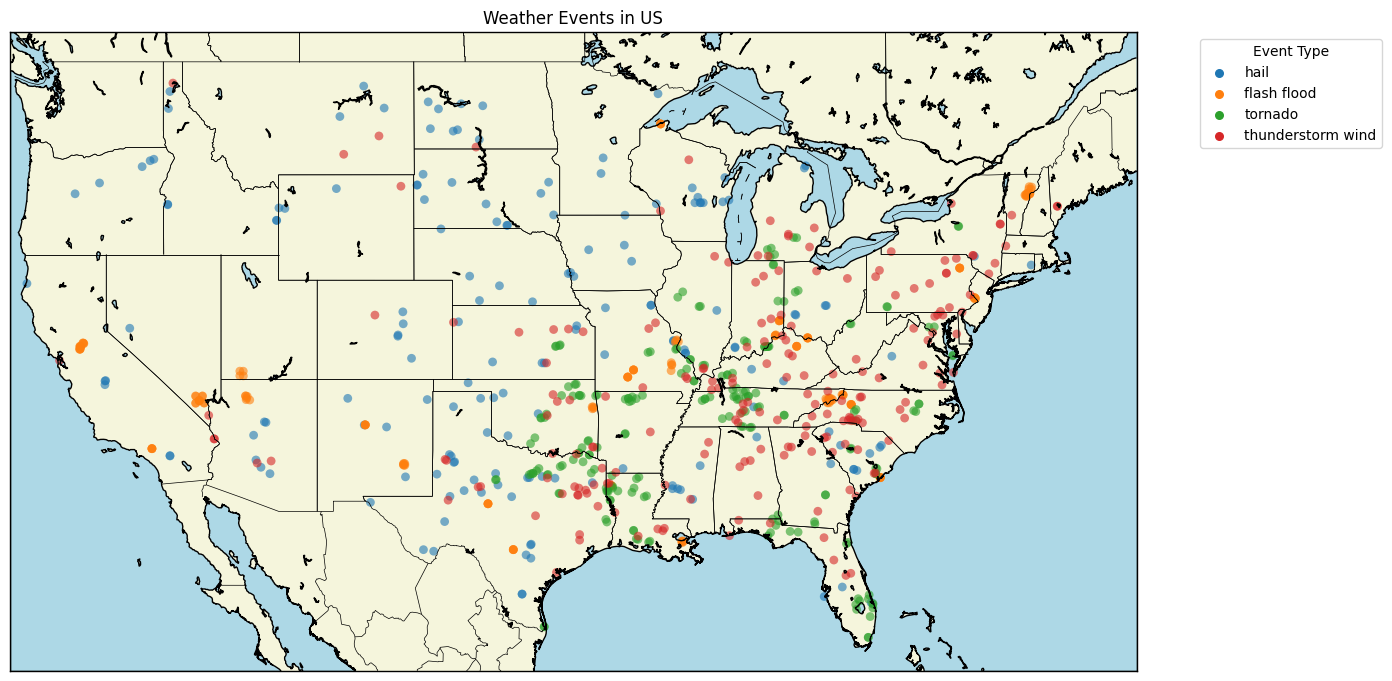

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Identify the necessary columns
lat_col = [col for col in df.columns if 'lat' in col.lower()][0]
lon_col = [col for col in df.columns if 'lon' in col.lower()][0]
event_col = [col for col in df.columns if 'event_type' in col.lower()][0]

# Drop rows with missing coordinates or event type
df_geo = df[[lat_col, lon_col, event_col]].dropna()

# Filter top 10 event types to reduce clutter
top_events = df_geo[event_col].value_counts().nlargest(10).index
df_top = df_geo[df_geo[event_col].isin(top_events)]

# Set up a zoomed-in Basemap (Central US hotspot for severe weather)
plt.figure(figsize=(14, 10))
m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=50,
            llcrnrlon=-125, urcrnrlon=-66.5, resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='beige', lake_color='lightblue')

# Project lat/lon to map coordinates
x, y = m(df_top[lon_col].values, df_top[lat_col].values)

# Assign colors to event types
import seaborn as sns
unique_events = df_top[event_col].unique()
palette = sns.color_palette("tab10", len(unique_events))
event_colors = dict(zip(unique_events, palette))
colors = df_top[event_col].map(event_colors)

# Scatter plot
m.scatter(x, y, c=colors, s=40, alpha=0.6, edgecolor='none')

# Add legend
for event, color in event_colors.items():
    plt.scatter([], [], c=[color], label=event, s=30)
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Weather Events in US")
plt.tight_layout()
plt.show()


In [370]:
# Combine all results
all_results_df = pd.concat([
    results_hail_df,
    results_thunderstorm_wind_df,
    results_flood_df,
    results_tornado_df
], ignore_index=True)

# Format the RMSE and R² columns to show 2 decimal places
formatted_results_df = all_results_df.copy()
formatted_results_df['R² Score'] = formatted_results_df['R² Score'].apply(lambda x: f"{x:.4f}")

print(formatted_results_df.to_string(index=False))

                                       Model         RMSE         R² Score
                    Linear Regression (Hail) 5.576990e+11 -4166551149.2681
              Random Forest Regressor (Hail) 7.479171e+06           0.2507
                Random Forest (GridSearchCV) 7.881403e+06           0.1679
      Linear Regression (Thunderstorm Winds) 1.523770e+06           0.0710
Random Forest Regressor (Thunderstorm Winds) 3.747842e+05           0.9438
             Linear Regression (Flash Flood) 9.951408e+07           0.1645
       Random Forest Regressor (Flash Flood) 2.064442e+07           0.9640
                 Linear Regression (Tornado) 5.681392e+07           0.4103
           Random Forest Regressor (Tornado) 2.778637e+07           0.8590


In [354]:
event_scores = {
    "Hail": formatted_results_df[formatted_results_df['Model'].str.contains("Hail")].iloc[-1],  # Use RF or best model
    "Thunderstorm Winds": formatted_results_df[formatted_results_df['Model'].str.contains("Thunderstorm")].iloc[-1],
    "Flash Flood": formatted_results_df[formatted_results_df['Model'].str.contains("Flash Flood")].iloc[-1],
    "Tornado": formatted_results_df[formatted_results_df['Model'].str.contains("Tornado")].iloc[-1]
}

In [398]:
# Show some predictions vs actual values for Tornado
tornado_model = tornado_models["Random Forest Regressor (Tornado)"]
tornado_preds = tornado_model.predict(X_test_scaled)

tornado_results_df = pd.DataFrame({
    "Predicted": np.round(tornado_preds, 2),
    "Actual": y_test.values
})

print("Tornado Results:\n")
print(tornado_results_df.head(10))


Tornado Results:

    Predicted    Actual
0   5082000.0   6000000
1  40768500.0  20000000
2   1102200.0    100000
3   1312900.0         0
4   2197180.0         0
5    670200.0    750000
6    121250.0     75000
7   3140000.0   5000000
8   1881000.0   1200000
9   1045600.0    750000


In [397]:
# Show some predictions vs actual values for Flash Flood
flood_model = flood_models["Random Forest Regressor (Flash Flood)"]
flood_preds = flood_model.predict(X_test_scaled_flood)

flood_results_df = pd.DataFrame({
    "Predicted": np.round(flood_preds, 2),
    "Actual": y_test_flood.values
})

print("Flash Flood Results:\n")
print(flood_results_df.head(10))

Flash Flood Results:

   Predicted   Actual
0    21600.0    20000
1    74100.0    60000
2  7150000.0  6500000
3       50.0        0
4   436000.0   500000
5      146.0        0
6  1911500.0  3000000
7  5000600.0        0
8        0.0        0
9   980000.0  1000000


In [396]:
# Show some predictions vs actual values for Hail
hail_model = hail_models["Random Forest Regressor (Hail)"]
hail_preds_log = hail_model.predict(X_test_scaled_hail)

hail_preds = np.expm1(hail_preds_log)
y_actual_hail = np.expm1(y_test_hail)

hail_results_df = pd.DataFrame({
    "Predicted": np.round(hail_preds, 2),
    "Actual": np.round(y_actual_hail, 2)
})

print("Hail Results:\n")
print(hail_results_df.head(10))

Hail Results:

     Predicted      Actual
105       5.99     15000.0
108   65434.11         0.0
142      42.95         0.0
55      101.85         0.0
94      732.73         0.0
29       16.12    200000.0
101    4549.48  10000000.0
51      588.31         0.0
100    5243.82  10000000.0
143   24468.84     15000.0


In [395]:
# Show some predictions vs actual values for Thunderstorm Winds
wind_model = thunderstorm_models["Random Forest Regressor (Thunderstorm Winds)"]
wind_preds = wind_model.predict(X_test_scaled_thunderstorm_wind)

wind_results_df = pd.DataFrame({
    "Predicted": np.round(wind_preds, 2),
    "Actual": y_test_thunderstorm_wind.values
})

print("Thunderstorm Wind Results:\n")
print(wind_results_df.head(10))

Thunderstorm Wind Results:

   Predicted   Actual
0     7070.0    10000
1     2715.0  2000000
2    16205.0        0
3   110320.0        0
4    76210.0        0
5     7945.0    20000
6     2650.0        0
7    33320.0        0
8    10620.0     1000
9    43020.0        0


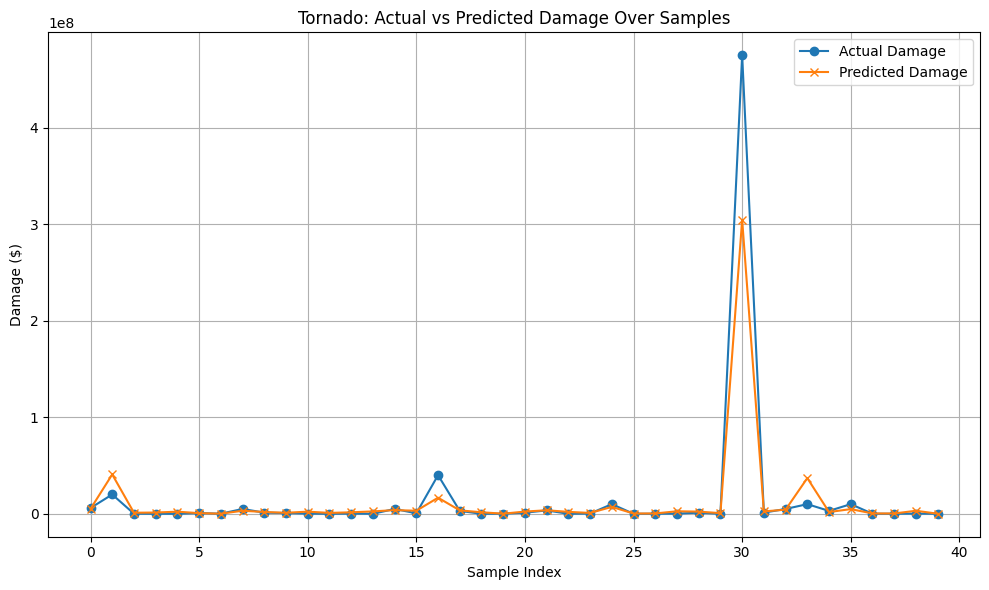

In [399]:
plt.figure(figsize=(10, 6))
plt.plot(tornado_results_df.index, tornado_results_df["Actual"], label="Actual Damage", marker='o')
plt.plot(tornado_results_df.index, tornado_results_df["Predicted"], label="Predicted Damage", marker='x')
plt.title("Tornado: Actual vs Predicted Damage Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Damage ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

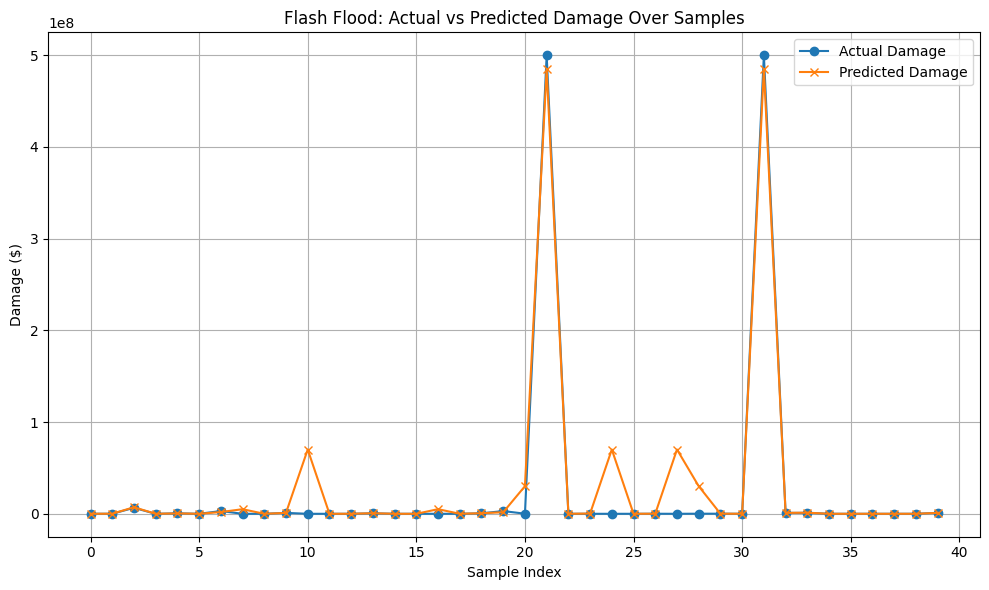

In [394]:
plt.figure(figsize=(10, 6))
plt.plot(flood_results_df.index, flood_results_df["Actual"], label="Actual Damage", marker='o')
plt.plot(flood_results_df.index, flood_results_df["Predicted"], label="Predicted Damage", marker='x')
plt.title("Flash Flood: Actual vs Predicted Damage Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Damage ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

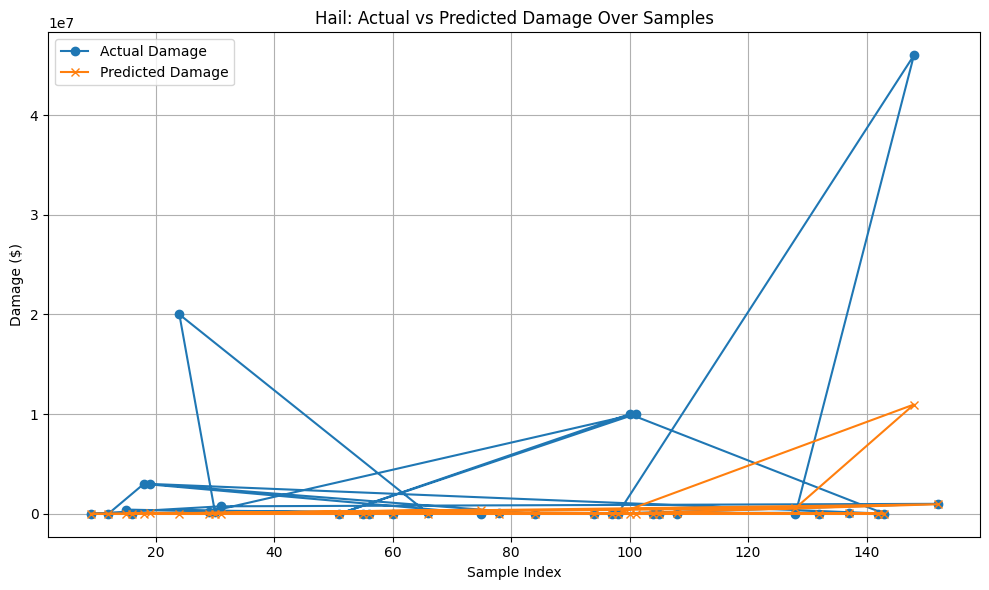

In [400]:
plt.figure(figsize=(10, 6))
plt.plot(hail_results_df.index, hail_results_df["Actual"], label="Actual Damage", marker='o')
plt.plot(hail_results_df.index, hail_results_df["Predicted"], label="Predicted Damage", marker='x')
plt.title("Hail: Actual vs Predicted Damage Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Damage ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

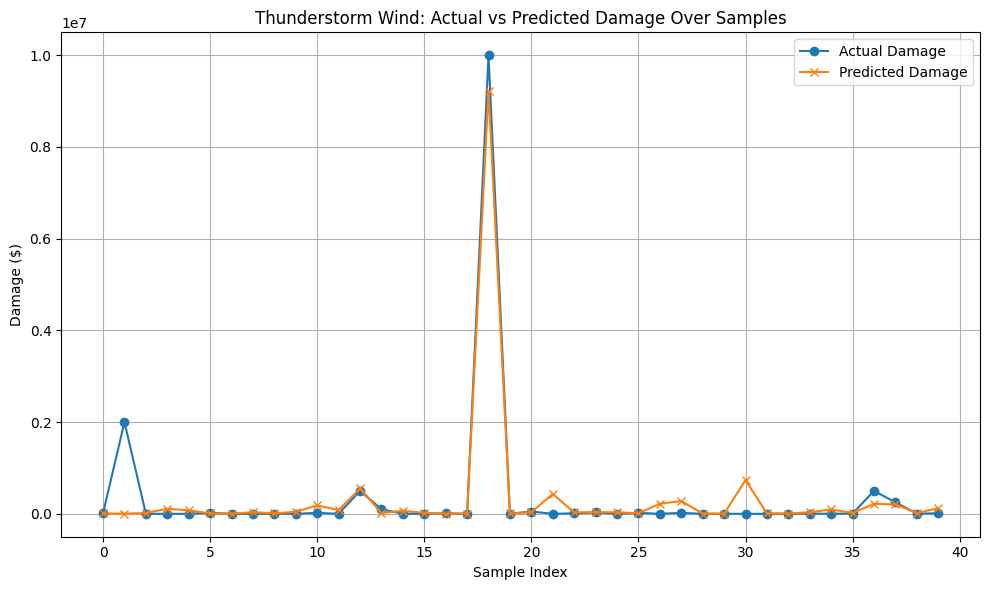

In [401]:
plt.figure(figsize=(10, 6))
plt.plot(wind_results_df.index, wind_results_df["Actual"], label="Actual Damage", marker='o')
plt.plot(wind_results_df.index, wind_results_df["Predicted"], label="Predicted Damage", marker='x')
plt.title("Thunderstorm Wind: Actual vs Predicted Damage Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Damage ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()